#  Linear Regression


Farhad kamangar 2019

## What is regression ?
Regression is a processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables. 

The most common form of regression analysis is linear regression

Equation of a straight-line in two dimensional space is:
$$\Large y = ax + b$$

where $a$ is commonly known as the **slope**, and $b$ is commonly known as the **intercept**.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

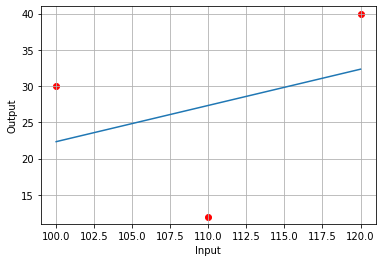

Model slope:     0.49999999999999994
Model intercept: -27.66666666666666


In [1]:
%matplotlib inline
#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from sklearn.linear_model import LinearRegression
from ipywidgets import interactive
import matplotlib.pyplot as plt
def plot_regression_points():
    
    x = np.array([100,120,110])
    y = np.array([30,40,12])
    model = LinearRegression(fit_intercept=True)

    model.fit(x[:, np.newaxis], y)

    xfit = np.linspace(np.amin(x), np.amax(x), 10)
    yfit = model.predict(xfit[:, np.newaxis])

    plt.scatter(x, y,c='red')
    plt.plot(xfit, yfit);
    #plt.scatter(x, y);
    
    
    plt.xlim(np.amin(x)-1,np.amax(x)+1)
    plt.ylim(np.amin(y)-1,np.amax(y)+1)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.grid(True)
    plt.show()
    print("Model slope:    ", model.coef_[0])
    print("Model intercept:", model.intercept_)

plot_regression_points()

In [2]:
def plot_regression_with_random_points(slope, intercept,noise_level):
    rng = np.random.RandomState(2)
    x = 20 * rng.rand(50)-10
    y = slope * x +intercept + noise_level*rng.randn(50)
    model = LinearRegression(fit_intercept=True)

    model.fit(x[:, np.newaxis], y)

    xfit = np.linspace(-10, 10, 1000)
    yfit = model.predict(xfit[:, np.newaxis])

    plt.scatter(x, y)
    plt.plot(xfit, yfit);
    #plt.scatter(x, y);
    
    plt.ylim(-10, 10)
    plt.xlim(-10,10)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.grid(True)
    plt.show()
    print("Model slope:    ", model.coef_[0])
    print("Model intercept:", model.intercept_)

interactive_plot = interactive(plot_regression_with_random_points,
                               slope=widgets.FloatSlider(min=-10,max=10,step=.1,value=1),
                               intercept=widgets.FloatSlider(min=-10,max=10,step=.1,value=-2),
                              noise_level=widgets.FloatSlider(min=0,max=10,step=.1,value=1.0))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='slope', max=10.0, min=-10.0), FloatSlider(value=-2.0…

In general, for the multidimensional linear models,where there are multiple $x$ values, the model equation is:


$$\large
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

Which can be written as:

$$\Large y=AX+b$$
where 
$$\large A = [a_1, a_2, a_3, \cdots , a_N]$$
and 
$$\large
\mathbf X =  \begin{bmatrix}
x_1  \\
x_2  \\
\vdots \\
x_N  
\end{bmatrix}
$$

Alternatively, the above equation may be written as:

$$\Large y=A'Z$$
where 
$$\large A' = [a_0,a_1, a_2, a_3, \cdots , a_N]$$
and 
$$\large
\mathbf Z =  \begin{bmatrix}
1 \\
z_1  \\
z_2  \\
\vdots \\
z_N  
\end{bmatrix}
$$

**Note:** in the alternative form $a_0=b$

Geometrically, this is fitting a hyper-plane to points in higher dimensions.

We can not visualize the multidimensional regressions but we can print the estimated parameters of the hyperplane.

In [3]:
rng = np.random.RandomState(1)
X = 20 * rng.rand(100, 3)-10
y = 2 + np.dot(X, [1.5, -2., 1.])+5*rng.randn(100)
model = LinearRegression(fit_intercept=True)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

2.22995593635777
[ 1.45398856 -1.94056069  0.93145105]
